# Importing Libraries

In [1]:
import numpy as np
import cv2

import PIL.Image as Image

import shutil
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import keras.applications
from keras.applications import vgg16

# from vgg16 import decode_prediction

import time

# Downloading Dataset From Kaggle

#### Dataset Link : https://www.kaggle.com/datasets/fanconic/skin-cancer-malignant-vs-benign

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

The syntax of the command is incorrect.
'cp' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
!kaggle datasets download -d fanconic/skin-cancer-malignant-vs-benign

'kaggle' is not recognized as an internal or external command,
operable program or batch file.


# Unzip Dataset

In [5]:
import zipfile
zip_ref = zipfile.ZipFile('/content/skin-cancer-malignant-vs-benign.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

# Setting Folder Structure

In [13]:
curr_dir = os.getcwd()
curr_dir

'/content'

In [14]:
# creating folders

datasetFolder = curr_dir + "/DATASET"
os.makedirs(datasetFolder)
os.makedirs(datasetFolder + "/benign")
os.makedirs(datasetFolder + "/malignant")

FileExistsError: ignored

In [15]:
# defining source and destination folders paths

src1 = curr_dir + "/test/benign"
src2 = curr_dir + "/train/benign"

src3 = curr_dir + "/test/malignant"
src4 = curr_dir + "/train/malignant"




benign_src = [src1, src2]
malignant_src = [src3, src4]

benign_dest = curr_dir + "/DATASET/benign"
malignant_dest = curr_dir + "/DATASET/malignant"

In [16]:
## copying files

for src in benign_src:
  for dirs, subdirs, files in os.walk(src):
    print(" Total benign files : ", len(files))
    for file in files:
      if file.endswith('.jpg'):
        filename = os.path.join(src, dirs, file)
        if os.path.exists(filename):
          print(filename)
          shutil.copy(filename, benign_dest)

for src in malignant_src:
  for dirs, subdirs, files in os.walk(src):
    print(" Total malignant files : ", len(files))
    for file in files:
      if file.endswith('.jpg'):
        filename = os.path.join(src, dirs, file)
        if os.path.exists(filename):
          print(filename)
          shutil.copy(filename, malignant_dest)

In [10]:
## deleting old folders

shutil.rmtree(curr_dir + "/data")
shutil.rmtree(curr_dir + "/test")
shutil.rmtree(curr_dir + "/train")

In [17]:
Total_images = 0

for dirs, subdirs, files in (os.walk(benign_dest)):
  print(f'Benign : {len(files)}')
  Total_images = Total_images + len(files)

for dirs, subdirs, files in (os.walk(malignant_dest)):
  print(f'Malignant : {len(files)}')
  Total_images = Total_images + len(files)

print(f'\nTotal images : {Total_images}')

Benign : 1800
Malignant : 1497

Total images : 3297


In [18]:
IMAGE_SHAPE = (224, 224)
EPOCHS = 50

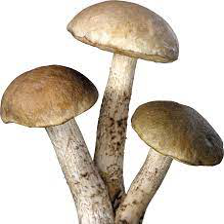

In [87]:
random_image = Image.open("./download.jpeg").resize(IMAGE_SHAPE)
random_image

In [20]:
data_dir = './DATASET'

In [21]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('DATASET')

In [92]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('DATASET/benign/1694.jpg'),
 PosixPath('DATASET/benign/145.jpg'),
 PosixPath('DATASET/benign/103.jpg'),
 PosixPath('DATASET/benign/439.jpg'),
 PosixPath('DATASET/benign/578.jpg')]

In [93]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3297


In [22]:
skin_images_dict = {
    'benign': list(data_dir.glob('benign/*')),
    'malignant': list(data_dir.glob('malignant/*')),
}

In [23]:
skin_labels_dict = {
    'benign': 0,
    'malignant': 1,
}

In [33]:
img = cv2.imread(str(skin_images_dict['benign'][1]))

In [34]:
img.shape

(224, 224, 3)

In [35]:
X, y = [], []

for cancer_name, images in skin_images_dict.items():
    
    for image in images:
        
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(skin_labels_dict[cancer_name])

In [42]:
X = np.array(X)
y = np.array(y)

In [46]:
X[0].shape

(224, 224, 3)

In [47]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

In [92]:
# x0_resized = cv2.resize(X[0], IMAGE_SHAPE)
# x1_resized = cv2.resize(X[1], IMAGE_SHAPE)
# x2_resized = cv2.resize(X[2], IMAGE_SHAPE)

# xr_resized = cv2.resize(X[3000], IMAGE_SHAPE)

In [49]:
classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

In [101]:
x_resized = []
for i in X:
  img_resized = cv2.resize(i, IMAGE_SHAPE)
  x_resized.append(img_resized)
  
predicted = classifier.predict(np.array(x_resized))
print(predicted)
y_classes = predicted.argmax(axis=-1)
y_classes

104/104 [==============================] - 3s 29ms/step
[[ 0.02961609  0.5383      0.69040066 ... -1.898771    1.8502247
   1.0428843 ]
 [ 0.08065203  0.09971891  1.1766218  ... -0.79883283 -0.5141011
   1.2771027 ]
 [ 0.22300306  0.36440676  1.4449722  ... -0.5059876   0.64163244
   0.78665674]
 ...
 [ 0.02408075  1.0295339   1.1857489  ... -1.2361871   1.8834722
   1.1859626 ]
 [ 0.24252662 -0.04057787  2.0345914  ... -1.3559467  -1.586396
   1.7357347 ]
 [ 0.29038945 -0.21660243  1.4949697  ... -1.1598403  -1.3533633
   3.4883034 ]]


array([795, 795, 795, ..., 795, 795, 795])

In [102]:
cnt = 0
for i in y_classes:
  if i == 795:
    cnt = cnt + 1
print(cnt)

2806


In [103]:
import collections

elements_count = collections.Counter(y_classes)

for key, value in elements_count.items():
   print(f"{key}: {value}")

795: 2806
905: 309
722: 127
550: 5
620: 10
531: 1
819: 7
418: 2
816: 17
702: 2
444: 9
637: 1
948: 1
